In [109]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier



In [6]:
tf_seba = pd.read_csv('tp2-datos/tp2-datos/src/features_seba.csv')
tf_santi = pd.read_csv('tp2-datos/tp2-datos/src/santi_timefeatures.csv')
tf_santi_2 = pd.read_csv('tp2-datos/tp2-datos/src/Santi_FeaturesConEventos.csv')
labels = pd.read_csv('../../data/labels_training_set.csv') #las personas de las cuales tengo Info
personas =pd.read_csv('../../data/trocafone_kaggle_test.csv') #las personas a las que le tengo que predecir

In [7]:
#Datos a entregar
santi_seba = pd.merge(tf_santi_2,tf_seba, on = 'person',how = 'inner')
datos = pd.merge(personas, santi_seba, on = 'person', how = 'inner')

In [8]:
#Datos para entrenar
#labels_f = pd.merge(tf_santi_2,tf_seba, on = 'person',how = 'inner')
labels_f = pd.merge(labels, santi_seba, on = 'person', how = 'inner')

In [9]:
y = labels_f.iloc[:,1:2]
X = labels_f.iloc[:,3: 406]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 123)

xgboost

In [149]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

xg_reg.fit(X_train, y_train['label'])
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, proba))

ROC auc score:  0.8602808960083497


lightgbm

In [150]:

params = {
    'objective': 'binary',
    'metric': {'roc_auc'},
    'num_leaves': 11,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 7,
    'max_depth': 5,
}

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X_train, y_train['label'])

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, preds))


ROC auc score:  0.8760167732127764


#### Para subir a Kaggle

In [151]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X, y['label'])


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=5,
        metric='roc_auc', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=11,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [152]:
df_final = datos.filter(items= ['person'] + list(X.columns))
df_final_sin_persons= df_final.drop(columns='person')
df_final.head(10)

,person,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,...,viewed product mes 4,visited site mes 4,distan_dias,nuevo_mes_5,cant_dias_dist,modelos_dist,promedio_por_dia_x,promedio_por_mes,mes_primer_entrada,promedio_por_dia_y
0,4886f805,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0,1.0,1,1,9.000000,9.0,5,9.000000
1,0297fc1e,29.0,4.0,7.0,0.0,21.0,1.0,0.0,6.0,0.0,...,100.0,22.0,138,0.0,59,15,9.610169,113.4,1,11.533333
2,2d681dd8,1.0,5.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,9,1.0,2,3,13.000000,26.0,5,13.000000
3,cccea85e,15.0,7.0,1.0,0.0,20.0,0.0,26.0,1.0,5.0,...,0.0,0.0,23,1.0,13,57,64.307692,836.0,5,64.307692
4,4c8a8b93,14.0,8.0,2.0,0.0,14.0,0.0,13.0,9.0,0.0,...,0.0,0.0,4,1.0,5,9,51.400000,257.0,5,51.400000
5,29ebb414,4.0,0.0,1.0,0.0,3.0,0.0,4.0,11.0,0.0,...,0.0,0.0,2,1.0,2,3,17.500000,35.0,5,17.500000
6,3dc1950f,3.0,6.0,3.0,0.0,25.0,0.0,7.0,2.0,1.0,...,347.0,13.0,41,0.0,19,56,35.368421,336.0,4,26.090909
7,8ea4c165,13.0,5.0,3.0,0.0,8.0,0.0,9.0,17.0,0.0,...,10.0,2.0,20,0.0,5,15,31.800000,79.5,4,43.666667
8,d8cfe234,0.0,4.0,3.0,1.0,1.0,0.0,2.0,8.0,0.0,...,3.0,1.0,42,0.0,5,7,12.400000,31.0,4,13.250000
9,d6bc64df,10.0,0.0,2.0,0.0,12.0,0.0,8.0,19.0,0.0,...,90.0,5.0,30,0.0,7,13,30.428571,106.5,4,32.666667


In [153]:
proba = pd.Series(lgbm.predict_proba(df_final_sin_persons)[:,1])

predicciones = df_final[['person']]

predicciones['label'] = proba

C:\Users\seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [154]:
predicciones.to_csv('predicciones_lgbm.csv', encoding='utf-8', index=False)

In [155]:
predicciones.shape

(19415, 2)

In [163]:
predicciones.head()

,person,label
0,4886f805,0.003592
1,0297fc1e,0.039446
2,2d681dd8,0.018425
3,cccea85e,0.051121
4,4c8a8b93,0.010524


# Seleccion de features con RFE

### Usando todos los features con XGBoost

In [3]:
from sklearn.feature_selection import RFE
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)


In [12]:
n = 43
rfe = RFE(xg_reg, n)
rfe = rfe.fit(X, y['label'].ravel())
   
print('n = ', n)
   
# Selecciono los n features para entrenar
mask = rfe.get_support()
features_X = X.columns[mask]
new_x = X.filter(items=features_X)

n =  43


In [31]:
# Entrenamos y predecimos
X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)
    
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

xg_reg.fit(X_train,y_train)
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, proba))
# con tf_santi_2,tf_seba, y n=43 me da 0.8626966186972823 (Filtrando X) ESTE SUBI A KAGGLE Y DIO 0.86148

ROC auc score:  0.8659617795374746


### Con lightgbm

In [117]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

In [118]:
n = 43
rfe = RFE(lgbm, n)
rfe = rfe.fit(X, y['label'].ravel())
   
print('n = ', n)
   
# Selecciono los n features para entrenar
mask = rfe.get_support()
features_X = X.columns[mask]
new_x = X.filter(items=features_X)

n =  43


In [120]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)

lgbm.fit(X_train, y_train)

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, preds))


ROC auc score:  0.8627774500405576


## RFECV con lightgbm

Optimal number of features : 46


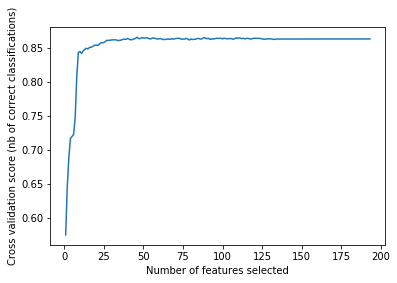

In [70]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)


rfecv = RFECV(estimator=lgbm, step=1, cv=StratifiedKFold(10), n_jobs=3, scoring='roc_auc')

rfecv.fit(X, y['label'].ravel())

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [71]:
# Selecciono los n features para entrenar
mask = rfecv.get_support()
features_X = X.columns[mask]
new_x = X.filter(items=features_X)

# Pruebo
X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)

rf.fit(X_train, y_train)

preds = rf.predict_proba(X_test)[:,1]
print("ROC auc score con RandomForest: ", roc_auc_score(y_test, preds))

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X_train, y_train)

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score con LightGBM: ", roc_auc_score(y_test, preds))

xg_reg.fit(X_train,y_train)
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score con xgboost: ", roc_auc_score(y_test, proba))

ROC auc score con RandomForest:  0.8635595287390877
ROC auc score con LightGBM:  0.8703805596365142


## RFECV con xgb

Optimal number of features : 23


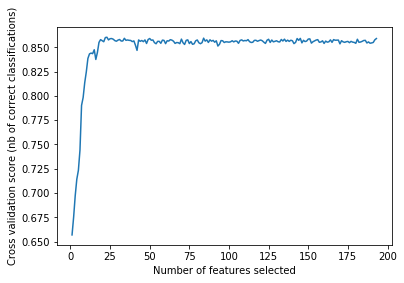

In [110]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

rfecv = RFECV(estimator=xg_reg, step=1, cv=StratifiedKFold(10), n_jobs=3, scoring='roc_auc')

rfecv.fit(X, y['label'].ravel())

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [171]:
# Selecciono los n features para entrenar
mask = rfecv.get_support()
features_X = X.columns[mask]
xgb_x = X.filter(items=features_X)

# Pruebo
X_train, X_test, y_train, y_test = train_test_split(xgb_x, y['label'], test_size=0.2, random_state=20)

rf.fit(X_train, y_train)

preds = rf.predict_proba(X_test)[:,1]
print("ROC auc score con RandomForest: ", roc_auc_score(y_test, preds))

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X_train, y_train)

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score con LightGBM: ", roc_auc_score(y_test, preds))

xg_reg.fit(X_train,y_train)
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score con xgboost: ", roc_auc_score(y_test, proba))

catb = CatBoostClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 60, scale_pos_weight = 7,\
                          eval_metric='AUC', verbose=False)


catb.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

proba = catb.predict_proba(X_test)[:,1]
print("ROC auc score con Catboost: ", roc_auc_score(y_test, proba))


ROC auc score con RandomForest:  0.8648308046544139
ROC auc score con LightGBM:  0.8682496607869743
ROC auc score con xgboost:  0.861951262968902
ROC auc score con Catboost:  0.8670634431150035


In [172]:
cant_ceros = np.sum(y_train == 0)
cant_unos = np.sum(y_train == 1)
cant_unos, cant_ceros

(782, 14749)

In [174]:
from imblearn.over_sampling import RandomOverSampler
    
ros = RandomOverSampler(random_state=20, sampling_strategy = {0: cant_ceros, 1: 800})
X_train_res, y_train_res = ros.fit_sample(X_train, y_train)
X_train_res_df = pd.DataFrame(X_train_res)
X_train_res_df.columns = X_test.columns

In [175]:
rf.fit(X_train_res_df, y_train_res)

preds = rf.predict_proba(X_test)[:,1]
print("ROC auc score con RandomForest: ", roc_auc_score(y_test, preds))

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X_train_res_df, y_train_res)

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score con LightGBM: ", roc_auc_score(y_test, preds))

xg_reg.fit(X_train_res_df,y_train_res)
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score con xgboost: ", roc_auc_score(y_test, proba))

catb = CatBoostClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 60, scale_pos_weight = 7,\
                          eval_metric='AUC', verbose=False)


catb.fit(X_train_res_df, y_train_res, eval_set=(X_test, y_test), use_best_model=True)

proba = catb.predict_proba(X_test)[:,1]
print("ROC auc score con Catboost: ", roc_auc_score(y_test, proba))


ROC auc score con RandomForest:  0.8648410838370133
ROC auc score con LightGBM:  0.8706070199964365
ROC auc score con xgboost:  0.8630161862861998
ROC auc score con Catboost:  0.8665063114181161


## Promedio

In [138]:
lgbm.fit(X_train, y_train)

preds_lgbm = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score LightGBM: ", roc_auc_score(y_test, preds_lgbm))

xg_reg.fit(X_train,y_train)
preds_xgb = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score XGBoost: ", roc_auc_score(y_test, preds_xgb))

rf.fit(X_train, y_train)

preds_rf = rf.predict_proba(X_test)[:,1]
print("ROC auc score RandomForest: ", roc_auc_score(y_test, preds_rf))

catb.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

preds_cb = catb.predict_proba(X_test)[:,1]
print("ROC auc score con Catboost: ", roc_auc_score(y_test, preds_cb))



prom_preds = 0.1*preds_xgb + 0.6*preds_lgbm  + 0.3*preds_cb
print("ROC auc score promedio: ", roc_auc_score(y_test, prom_preds))


ROC auc score LightGBM:  0.8729146931528762
ROC auc score XGBoost:  0.8621995768408275
ROC auc score RandomForest:  0.8619159580924938
ROC auc score con Catboost:  0.8744816867374201
ROC auc score promedio:  0.8758692914636429


#### Para subir a Kaggle

In [123]:
lgbm.fit(xgb_x, y['label'])

xg_reg.fit(xgb_x, y['label'])

rf.fit(xgb_x, y['label'])

catb = CatBoostClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 60, scale_pos_weight = 7,\
                          eval_metric='AUC', verbose=False)

catb.fit(xgb_x, y['label'])


In [124]:
df_final = datos.filter(items= ['person'] + list(xgb_x.columns))
df_final_sin_persons= df_final.drop(columns='person')
df_final.head(10)

,person,brand listing,checkout,conversion,generic listing,search engine hit,searched products,viewed product,vis_iPhone SE,vis_Samsung Galaxy J7 2016 Metal,...,visitedsite_Computer,visitedsite_Smartphone,checkout mes 5,conversion mes 5,viewed product mes 5,dias_hasta_ultimo,visited site mes 4,distan_dias,promedio_por_dia_x,promedio_por_mes
0,4886f805,0.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,...,0.0,1.0,1.0,0.0,4.0,13,0.0,0,9.000000,9.0
1,0297fc1e,4.0,7.0,0.0,21.0,0.0,6.0,404.0,8.0,0.0,...,0.0,1.0,2.0,0.0,133.0,3,22.0,138,9.610169,113.4
2,2d681dd8,5.0,1.0,0.0,1.0,2.0,1.0,13.0,0.0,0.0,...,1.0,0.0,1.0,0.0,13.0,4,0.0,9,13.000000,26.0
3,cccea85e,7.0,1.0,0.0,20.0,26.0,1.0,739.0,0.0,0.0,...,1.0,0.0,1.0,0.0,739.0,0,0.0,23,64.307692,836.0
4,4c8a8b93,8.0,2.0,0.0,14.0,13.0,9.0,177.0,26.0,0.0,...,0.0,1.0,2.0,0.0,177.0,9,0.0,4,51.400000,257.0
5,29ebb414,0.0,1.0,0.0,3.0,4.0,11.0,8.0,0.0,0.0,...,0.0,1.0,1.0,0.0,8.0,11,0.0,2,17.500000,35.0
6,3dc1950f,6.0,3.0,0.0,25.0,7.0,2.0,595.0,0.0,0.0,...,1.0,0.0,2.0,0.0,248.0,2,13.0,41,35.368421,336.0
7,8ea4c165,5.0,3.0,0.0,8.0,9.0,17.0,97.0,1.0,1.0,...,1.0,0.0,2.0,0.0,87.0,12,2.0,20,31.800000,79.5
8,d8cfe234,4.0,3.0,1.0,1.0,2.0,8.0,39.0,0.0,0.0,...,1.0,0.0,2.0,1.0,36.0,9,1.0,42,12.400000,31.0
9,d6bc64df,0.0,2.0,0.0,12.0,8.0,19.0,155.0,25.0,0.0,...,1.0,1.0,1.0,0.0,65.0,13,5.0,30,30.428571,106.5


In [133]:
proba_lgbm = pd.Series(lgbm.predict_proba(df_final_sin_persons)[:,1])
proba_xgb = pd.Series(xg_reg.predict_proba(df_final_sin_persons)[:,1])
proba_rf = pd.Series(rf.predict_proba(df_final_sin_persons)[:,1])
proba_cb = pd.Series(catb.predict_proba(df_final_sin_persons)[:,1])
predicciones = df_final[['person']]

predicciones['label'] = 0.2*proba_xgb + 0.7*proba_lgbm + 0.1*proba_cb

# El mejor submit fue con 0.1*xgb, 0.8*lgbm y 0.1*catb con RFECV(estimator=xg_reg) kfolds=10 y n=23

C:\Users\seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [136]:
predicciones.to_csv('predicciones_promedio_catb.csv', encoding='utf-8', index=False)

In [134]:
predicciones.shape

(19415, 2)

In [135]:
predicciones.head()

,person,label
0,4886f805,0.038628
1,0297fc1e,0.109359
2,2d681dd8,0.072508
3,cccea85e,0.073369
4,4c8a8b93,0.062750


# Selección de features pero con los puntajes de Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier


In [20]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0, class_weight = {0: 1, 1: 15})

n = 43
rfe = RFE(rf, n)
rfe = rfe.fit(X, y['label'].ravel())
   
print('n = ', n)
   
# Selecciono los n features para entrenar
mask = rfe.get_support()
features_X = X.columns[mask]
new_x = X.filter(items=features_X)

n =  43


In [21]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)

rf.fit(X_train, y_train)

preds = rf.predict_proba(X_test)[:,1]
print("ROC auc score con RandomForest: ", roc_auc_score(y_test, preds))

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X_train, y_train)

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score con LightGBM: ", roc_auc_score(y_test, preds))

ROC auc score con RandomForest:  0.8631539539289705
ROC auc score con LightGBM:  0.8663595548320128


#### Con REFCV

Optimal number of features : 18


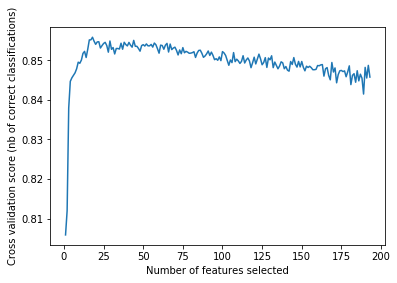

In [106]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0, class_weight = {0: 1, 1: 15})

rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(10), n_jobs=3, scoring='roc_auc')

rfecv.fit(X, y['label'].ravel())

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [86]:
lgbm.fit(X_train, y_train)

preds_lgbm = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score LightGBM: ", roc_auc_score(y_test, preds_lgbm))

xg_reg.fit(X_train,y_train)
preds_xgb = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score XGBoost: ", roc_auc_score(y_test, preds_xgb))

rf.fit(X_train, y_train)

preds_rf = rf.predict_proba(X_test)[:,1]
print("ROC auc score RandomForest: ", roc_auc_score(y_test, preds_rf))


prom_preds = 0.1*preds_xgb + 0.7*preds_lgbm + 0.2*preds_rf
print("ROC auc score promedio: ", roc_auc_score(y_test, prom_preds))


ROC auc score LightGBM:  0.8703805596365142
ROC auc score XGBoost:  0.8602270084461664
ROC auc score RandomForest:  0.8635595287390877
ROC auc score promedio:  0.8705166966357144


In [108]:
# Selecciono los n features para entrenar
mask = rfecv.get_support()
features_X = X.columns[mask]
rf_x = X.filter(items=features_X)

# Pruebo
X_train, X_test, y_train, y_test = train_test_split(rf_x, y['label'], test_size=0.2, random_state=123)

rf.fit(X_train, y_train)

preds = rf.predict_proba(X_test)[:,1]
print("ROC auc score con RandomForest: ", roc_auc_score(y_test, preds))

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X_train, y_train)

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score con LightGBM: ", roc_auc_score(y_test, preds))

ROC auc score con RandomForest:  0.8616961535625351
ROC auc score con LightGBM:  0.8628008485872949


## Funciones CV

In [107]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [ ]:
def stratifiedCVConRFE(data, n, model):
    
    df_train = pd.merge(data, labels,how = 'inner', on ='person')
    df_train.drop(columns = ['person'],inplace = True)
    
    X = df_train.drop(columns = ['label'])
    y = df_train['label']

    
    stratifiedKFold = StratifiedKFold(n_splits = 10, random_state = 7)
    
    #n = 22
    rfe = RFE(model, n)
    rfe = rfe.fit(X, y.ravel())

    # Selecciono los n features para entrenar
    mask = rfe.get_support()
    features_X = X.columns[mask]
    X = X.filter(items = features_X)
    
    results = cross_val_score(model, X, y, cv = stratifiedKFold, scoring = 'roc_auc')
        
    print("ROC AUC: ",results.mean())
    return results.mean()

In [1]:
def stratifiedCV(X, y, model):
    
    stratifiedKFold = StratifiedKFold(n_splits = 10, random_state = 7)
    
    results = cross_val_score(model, X, y['label'], cv = stratifiedKFold, scoring = 'roc_auc')
    #results2 = cross_val_predict(model, X, y, cv = stratifiedKFold, method='predict_proba')
    
    print("ROC AUC: ",results.mean())

In [129]:
stratifiedCV(X, y, lgbm)

ROC AUC:  0.8630917479017765


features_varios

In [176]:
varios = pd.read_csv('tp2-datos/tp2-datos/features_varios.csv')

In [177]:
#Datos para entrenar
#labels_f = pd.merge(tf_santi_2,tf_seba, on = 'person',how = 'inner')
labels_v = pd.merge(labels, varios, on = 'person', how = 'inner')

In [178]:
y = labels_v.iloc[:,1:2]
X = labels_v.iloc[:,3: 406]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 123)

xgboost

In [180]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

xg_reg.fit(X_train, y_train['label'])
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, proba))

ROC auc score:  0.8561138275484563


lightgbm

In [181]:

params = {
    'objective': 'binary',
    'metric': {'roc_auc'},
    'num_leaves': 11,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 7,
    'max_depth': 5,
}

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X_train, y_train['label'])

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, preds))


ROC auc score:  0.860977180035509


## RFECV con xgb

Optimal number of features : 36


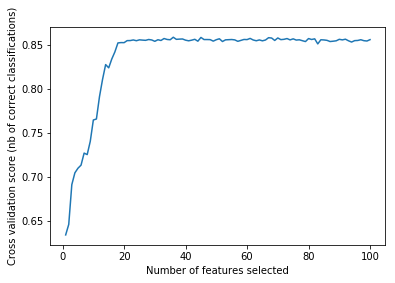

In [184]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

rfecv = RFECV(estimator=xg_reg, step=1, cv=StratifiedKFold(10), scoring='roc_auc')

rfecv.fit(X, y['label'].ravel())

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [171]:
# Selecciono los n features para entrenar
mask = rfecv.get_support()
features_X = X.columns[mask]
xgb_x = X.filter(items=features_X)

# Pruebo
X_train, X_test, y_train, y_test = train_test_split(xgb_x, y['label'], test_size=0.2, random_state=20)

rf.fit(X_train, y_train)

preds = rf.predict_proba(X_test)[:,1]
print("ROC auc score con RandomForest: ", roc_auc_score(y_test, preds))

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='roc_auc', num_leaves=11, learning_rate=0.1,\
                         max_depth=5,)

lgbm.fit(X_train, y_train)

preds = lgbm.predict_proba(X_test)[:,1]
print("ROC auc score con LightGBM: ", roc_auc_score(y_test, preds))

xg_reg.fit(X_train,y_train)
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score con xgboost: ", roc_auc_score(y_test, proba))

catb = CatBoostClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 60, scale_pos_weight = 7,\
                          eval_metric='AUC', verbose=False)


catb.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

proba = catb.predict_proba(X_test)[:,1]
print("ROC auc score con Catboost: ", roc_auc_score(y_test, proba))


ROC auc score con RandomForest:  0.8648308046544139
ROC auc score con LightGBM:  0.8682496607869743
ROC auc score con xgboost:  0.861951262968902
ROC auc score con Catboost:  0.8670634431150035
